<a href="https://colab.research.google.com/github/k0402/0615_FinMind/blob/main/interest_FX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imports import *

list_of_countries = ['AUS', 'CAN', 'JAP', 'NOR', 'SWE', 'SWI', 'UK','USA']
list_of_currencies = ['AUD', 'CAD', 'JPY', 'NOK', 'SEK', 'CHF', 'GBP','USD']



#####################
#Load Data
#####################

xls = pd.ExcelFile('parameters_data.xlsx')
x = pd.read_excel(xls, 'AUS')
x.head()
x.loc[:,'Sigma_2_AUS':'Unnamed: 25']

print('xls')

xls


In [2]:
#Extract K0P_1
K0P_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0P_1_' + country
    K0P_1[country] = np.matrix(df[location]).reshape((3,1))


K0P_1['AUS'].shape


(3, 1)

In [3]:
#Extract K0P_2
K0P_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0P_2_' + country
    K0P_2[country] = np.matrix(df[location]).reshape((3,1))

K0P_2['AUS'].shape

#Extract K1P_1
K1P_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    K1P_1[country] = np.matrix(df.iloc[:,2:5])

K1P_1['AUS'].shape

#Extract K1P_1
K1P_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    K1P_2[country] = np.matrix(df.iloc[:,5:8])

K1P_2['AUS'].shape


(3, 3)

In [4]:
#Extract roh0_1
rho0_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho0_1_' + country
    rho0_1[country] = np.matrix(df[location].dropna()).reshape((1,1))

rho0_1['AUS'].shape
rho0_1['AUS']


#Extract roh0_2
rho0_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho0_2_' + country
    rho0_2[country] = np.matrix(df[location].dropna()).reshape((1,1))

rho0_2['AUS'].shape

#Extract roh1_1
rho1_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho1_1_' + country
    rho1_1[country] = np.matrix(df[location].dropna()).reshape((3,1))

rho1_1['AUS'].shape

#Extract roh1_2
rho1_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho1_2_' + country
    rho1_2[country] = np.matrix(df[location].dropna()).reshape((3,1))

rho1_2['AUS'].shape


(3, 1)

In [5]:
#Extract K0Q_1
K0Q_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0Q_1_' + country
    K0Q_1[country] = np.matrix(df[location].dropna()).reshape((3,1))

K0Q_1['AUS'].shape

#Extract K0Q_2
K0Q_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0Q_2_' + country
    K0Q_2[country] = np.matrix(df[location].dropna()).reshape((3,1))

K0Q_2["AUS"].shape

#Extract K1Q_1
K1Q_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K1Q_1_' + country
    K1Q_1[country] = np.matrix(df.loc[:,location:'Unnamed: 16'].dropna())

K1Q_1['AUS'].shape

#Extract K1Q_2
K1Q_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K1Q_2_' + country
    K1Q_2[country] = np.matrix(df.loc[:,location:'Unnamed: 19'].dropna())

K1Q_2['AUS'].shape

#Extract Sigma_1
Sigma_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'Sigma_1_' + country
    Sigma_1[country] = np.matrix(df.loc[:,location:'Unnamed: 22'].dropna())

Sigma_1['AUS'].shape

#Extract Sigma_2
Sigma_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'Sigma_2_' + country
    Sigma_2[country] = np.matrix(df.loc[:,location:'Unnamed: 25'].dropna())

Sigma_2['AUS'].shape

#Create lambda_0_1
lambda_0_1 = {}
for country in list_of_countries[:-1]:
    lambda_0_1[country] = K0P_1[country] - K0Q_1[country]

lambda_0_1['AUS'].shape

#Create lambda_0_2
lambda_0_2 = {}
for country in list_of_countries[:-1]:
    lambda_0_2[country] = K0P_2[country] - K0Q_2[country]

lambda_0_2['AUS'].shape

#Create lambda_1_1
lambda_1_1 = {}
for country in list_of_countries[:-1]:
    lambda_1_1[country] = K1P_1[country] - K1Q_1[country]

lambda_1_1['AUS'].shape

#Create lambda_1_2
lambda_1_2 = {}
for country in list_of_countries[:-1]:
    lambda_1_2[country] = K1P_2[country] - K1Q_2[country]

lambda_1_2['AUS'].shape


(3, 3)

In [6]:
#####################
#End of Load Data
#####################

#####################
#Equations
#####################

#Defining the omega_2 Functions

def omega_2_1(country, k):
    identity = np.identity(3)
    part1 = lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T)
    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_1[country]).T,j-1)
        calc2 = np.power((identity + K1P_1[country]),j-1)
        calc3 = calc1 * calc2
        final_calc += calc3
    part2 = identity + final_calc
    part3 = np.linalg.inv(Sigma_1[country]) * lambda_1_1[country]
    result = part1 * part2 * part3
    return result

omega_2_1("JAP", 1)

def omega_2_2(country, k):
    identity = np.identity(3)
    part1 = lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T)
    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_2[country]).T,j-1)
        calc2 = np.power((identity + K1P_2[country]),j-1)
        calc3 = calc1 * calc2
        final_calc += calc3
    part2 = identity + final_calc
    part3 = np.linalg.inv(Sigma_2[country]) * lambda_1_2[country]
    result = part1 * part2 * part3
    return result


omega_2_2('CAN', 1)


#Defining the omega_1 Functions

def omega_1_1(country, k):
    identity = np.identity(3)
    part1 = rho1_1[country].T + (lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country])

    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_1[country]),j-1)
        final_calc += calc1
    part2 = identity + final_calc

    final_calc_2 = np.zeros((1,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = (K0P_1[country].T) * np.power((identity + K1P_1[country]).T, i-1) * (lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
            * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country]) * np.power((identity + K1P_1[country]), j-1)
            final_calc_2 += calc2

    result = (part1 * part2) + final_calc_2
    return result

omega_1_1('CAN', 1)
omega_1_1('JAP', 1).shape


(1, 3)

In [7]:
def omega_1_2(country, k):
    identity = np.identity(3)
    part1 = rho1_2[country].T + (lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country])

    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_2[country]),j-1)
        final_calc += calc1
    part2 = identity + final_calc

    final_calc_2 = np.zeros((1,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = (K0P_2[country].T) * np.power((identity + K1P_2[country]).T, i-1) * (lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
            * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country]) * np.power((identity + K1P_2[country]), j-1)
            final_calc_2 += calc2
    result = (part1 * part2) + final_calc_2
    return result

omega_1_2('AUS', 3)


def omega_0(country, k): #Does the structure make a difference?
    identity = np.identity(3)
    final_calc_1 = np.zeros((3,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc1 = np.power((identity + K1P_1[country]), i-1) * K0P_1[country]
            final_calc_1 += calc1
    mini_part1_1 = (k * (rho0_1[country] - rho0_2[country])) + (rho1_1[country].T * final_calc_1)

    final_calc_2 = np.zeros((3,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = np.power((identity + K1P_2[country]), i-1) * K0P_2[country]
            final_calc_2 += calc2
    mini_part1_2 = rho1_2[country].T * final_calc_2
    part1 = mini_part1_1 - mini_part1_2

    if k == 1:
        mini_part2_1 = (1/2) * lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_0_1[country]
        mini_part2_2 = (1/2) * lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_0_2[country]
    else:
        mini_part2_1 = ((1+k)/2) * lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_0_1[country]
        mini_part2_2 = ((1+k)/2) * lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_0_2[country]
    part2 = mini_part2_1 - mini_part2_2


    mini_part3_1 = lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * final_calc_1
    mini_part3_2 = lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * final_calc_2
    part3 = mini_part3_1 - mini_part3_2

    final_calc_3 = np.zeros((1,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc3 = K0P_1[country].T * np.power((identity + K1P_1[country]).T, i-1) * lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
             * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * np.power((identity + K1P_1[country]), i-1) * K0P_1[country]
            final_calc_3 += calc3


    mini_part4_1 = 1/2 * final_calc_3

    final_calc_5 = np.zeros((1,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc5 = K0P_2[country].T * np.power((identity + K1P_2[country]).T, i-1) * lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
             * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * np.power((identity + K1P_2[country]), i-1) * K0P_2[country]
            final_calc_5 += calc5

    mini_part4_2 = 1/2 * final_calc_5
    part4 = mini_part4_1 - mini_part4_2

    result = part1 + part2 + part3 + part4
    return result

omega_0('AUS',4)


def xi(country, k):
    identity = np.identity(3)
    final_calc_1 = np.zeros((3,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc1 = Sigma_1[country].T * np.power((identity + K1P_1[country]).T, i-1) * lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
             * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * np.power((identity + K1P_1[country]), i-1) * Sigma_1[country]
            final_calc_1 += calc1

    part1 = np.trace(1/2 * final_calc_1)

    final_calc_3 = np.zeros((3,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc3 = Sigma_2[country].T * np.power((identity + K1P_2[country]).T, i-1) * lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
             * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * np.power((identity + K1P_2[country]), i-1) * Sigma_2[country]
            final_calc_3 += calc3

    part2 = np.trace(1/2 * final_calc_3)

    result = part1 - part2
    return result

xi('AUS', 1)


0.0

In [8]:
#################
#PCA Calculator
################

ylds_start_date = {}
ylds_end_date = {}

xlsx = pd.ExcelFile('data_xrates_yields.xlsx')

yields_data = {}

for country in list_of_countries:
    yields_data[country] = pd.read_excel(xlsx, 'yields_'+country)
    yields_data[country]['date'] = yields_data[country].iloc[:,0] #Set first column as date
    yields_data[country] = yields_data[country].set_index('date')
    yields_data[country] = yields_data[country].iloc[:,1:]
    ylds_start_date.update({country: yields_data[country].index[0]})
    ylds_end_date.update({country: yields_data[country].index[-1]})




ylds_start_date

ylds_end_date

pca_dates = pd.read_excel('pca_model_dates.xlsx')  #Load the pca model dates to be used
pca_dates['NOR']

#Adjust the Dates as per the peremeter estimation Dates
for country in list_of_countries:
    yields_data[country] = yields_data[country].loc[pca_dates[country][0]:pca_dates[country][1]]
    ylds_start_date.update({country: yields_data[country].index[0]})
    ylds_end_date.update({country: yields_data[country].index[-1]})

ylds_start_date

ylds_end_date

#Create a list of forecasting dates, that will hold all the dates for which we need to create forecasts
# Remember that '2015-12-31' is the date where our constant values calculation ends and from this on we want to use our model to forecast values
forecasting_dates = list(yields_data['AUS'].loc['2015-12-31':].index)

forecasting_dates


[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

100%|██████████| 7/7 [01:31<00:00, 13.04s/it]


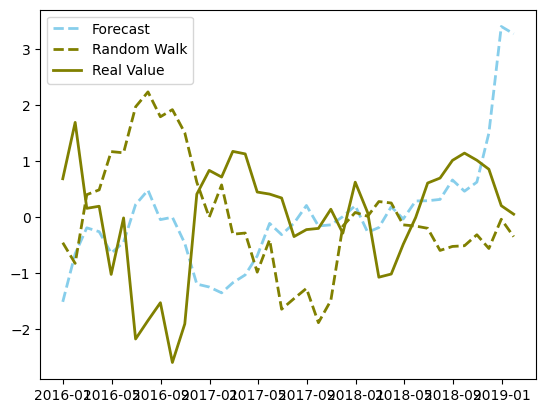

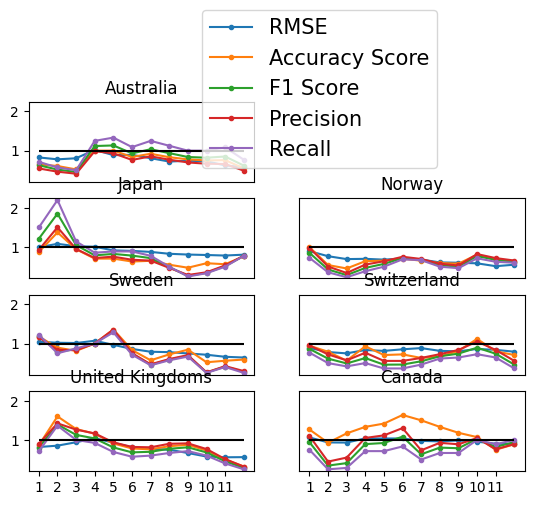

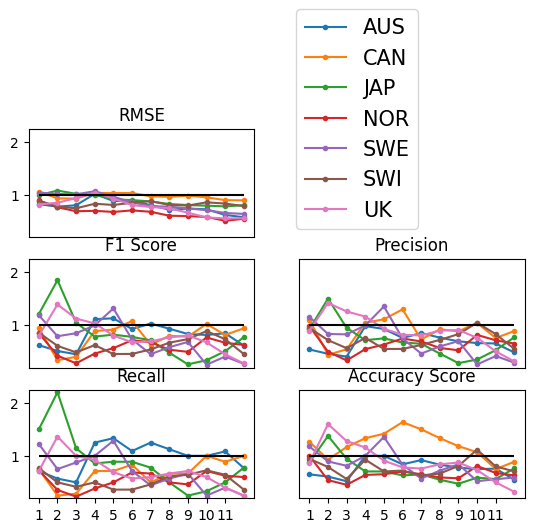

In [9]:
from imports import *

list_of_countries = ['AUS', 'CAN', 'JAP', 'NOR', 'SWE', 'SWI', 'UK','USA']
list_of_currencies = ['AUD', 'CAD', 'JPY', 'NOK', 'SEK', 'CHF', 'GBP','USD']



#####################
#Load Data
#####################

xls = pd.ExcelFile('data/parameters_data.xlsx')
x = pd.read_excel(xls, 'AUS')
x.head()
x.loc[:,'Sigma_2_AUS':'Unnamed: 25']

#Extract K0P_1
K0P_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0P_1_' + country
    K0P_1[country] = np.matrix(df[location]).reshape((3,1))


K0P_1['AUS'].shape

#Extract K0P_2
K0P_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0P_2_' + country
    K0P_2[country] = np.matrix(df[location]).reshape((3,1))

K0P_2['AUS'].shape

#Extract K1P_1
K1P_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    K1P_1[country] = np.matrix(df.iloc[:,2:5])

K1P_1['AUS'].shape

#Extract K1P_1
K1P_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    K1P_2[country] = np.matrix(df.iloc[:,5:8])

K1P_2['AUS'].shape

#Extract roh0_1
rho0_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho0_1_' + country
    rho0_1[country] = np.matrix(df[location].dropna()).reshape((1,1))

rho0_1['AUS'].shape
rho0_1['AUS']


#Extract roh0_2
rho0_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho0_2_' + country
    rho0_2[country] = np.matrix(df[location].dropna()).reshape((1,1))

rho0_2['AUS'].shape

#Extract roh1_1
rho1_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho1_1_' + country
    rho1_1[country] = np.matrix(df[location].dropna()).reshape((3,1))

rho1_1['AUS'].shape

#Extract roh1_2
rho1_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'rho1_2_' + country
    rho1_2[country] = np.matrix(df[location].dropna()).reshape((3,1))

rho1_2['AUS'].shape

#Extract K0Q_1
K0Q_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0Q_1_' + country
    K0Q_1[country] = np.matrix(df[location].dropna()).reshape((3,1))

K0Q_1['AUS'].shape

#Extract K0Q_2
K0Q_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K0Q_2_' + country
    K0Q_2[country] = np.matrix(df[location].dropna()).reshape((3,1))

K0Q_2["AUS"].shape

#Extract K1Q_1
K1Q_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K1Q_1_' + country
    K1Q_1[country] = np.matrix(df.loc[:,location:'Unnamed: 16'].dropna())

K1Q_1['AUS'].shape

#Extract K1Q_2
K1Q_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'K1Q_2_' + country
    K1Q_2[country] = np.matrix(df.loc[:,location:'Unnamed: 19'].dropna())

K1Q_2['AUS'].shape

#Extract Sigma_1
Sigma_1 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'Sigma_1_' + country
    Sigma_1[country] = np.matrix(df.loc[:,location:'Unnamed: 22'].dropna())

Sigma_1['AUS'].shape

#Extract Sigma_2
Sigma_2 = {}
for country in list_of_countries[:-1]:
    df = pd.read_excel(xls, country)
    location = 'Sigma_2_' + country
    Sigma_2[country] = np.matrix(df.loc[:,location:'Unnamed: 25'].dropna())

Sigma_2['AUS'].shape

#Create lambda_0_1
lambda_0_1 = {}
for country in list_of_countries[:-1]:
    lambda_0_1[country] = K0P_1[country] - K0Q_1[country]

lambda_0_1['AUS'].shape

#Create lambda_0_2
lambda_0_2 = {}
for country in list_of_countries[:-1]:
    lambda_0_2[country] = K0P_2[country] - K0Q_2[country]

lambda_0_2['AUS'].shape

#Create lambda_1_1
lambda_1_1 = {}
for country in list_of_countries[:-1]:
    lambda_1_1[country] = K1P_1[country] - K1Q_1[country]

lambda_1_1['AUS'].shape

#Create lambda_1_2
lambda_1_2 = {}
for country in list_of_countries[:-1]:
    lambda_1_2[country] = K1P_2[country] - K1Q_2[country]

lambda_1_2['AUS'].shape

#####################
#End of Load Data
#####################

#####################
#Equations
#####################

#Defining the omega_2 Functions

def omega_2_1(country, k):
    identity = np.identity(3)
    part1 = lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T)
    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_1[country]).T,j-1)
        calc2 = np.power((identity + K1P_1[country]),j-1)
        calc3 = calc1 * calc2
        final_calc += calc3
    part2 = identity + final_calc
    part3 = np.linalg.inv(Sigma_1[country]) * lambda_1_1[country]
    result = part1 * part2 * part3
    return result

omega_2_1("JAP", 1)

def omega_2_2(country, k):
    identity = np.identity(3)
    part1 = lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T)
    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_2[country]).T,j-1)
        calc2 = np.power((identity + K1P_2[country]),j-1)
        calc3 = calc1 * calc2
        final_calc += calc3
    part2 = identity + final_calc
    part3 = np.linalg.inv(Sigma_2[country]) * lambda_1_2[country]
    result = part1 * part2 * part3
    return result


omega_2_2('CAN', 1)


#Defining the omega_1 Functions

def omega_1_1(country, k):
    identity = np.identity(3)
    part1 = rho1_1[country].T + (lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country])

    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_1[country]),j-1)
        final_calc += calc1
    part2 = identity + final_calc

    final_calc_2 = np.zeros((1,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = (K0P_1[country].T) * np.power((identity + K1P_1[country]).T, i-1) * (lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
            * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country]) * np.power((identity + K1P_1[country]), j-1)
            final_calc_2 += calc2

    result = (part1 * part2) + final_calc_2
    return result

omega_1_1('CAN', 1)
omega_1_1('JAP', 1).shape

def omega_1_2(country, k):
    identity = np.identity(3)
    part1 = rho1_2[country].T + (lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country])

    final_calc = np.zeros((3,3))
    for j in list(range(2,k+1)):
        calc1 = np.power((identity + K1P_2[country]),j-1)
        final_calc += calc1
    part2 = identity + final_calc

    final_calc_2 = np.zeros((1,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = (K0P_2[country].T) * np.power((identity + K1P_2[country]).T, i-1) * (lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
            * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country]) * np.power((identity + K1P_2[country]), j-1)
            final_calc_2 += calc2
    result = (part1 * part2) + final_calc_2
    return result

omega_1_2('AUS', 3)


def omega_0(country, k): #Does the structure make a difference?
    identity = np.identity(3)
    final_calc_1 = np.zeros((3,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc1 = np.power((identity + K1P_1[country]), i-1) * K0P_1[country]
            final_calc_1 += calc1
    mini_part1_1 = (k * (rho0_1[country] - rho0_2[country])) + (rho1_1[country].T * final_calc_1)

    final_calc_2 = np.zeros((3,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc2 = np.power((identity + K1P_2[country]), i-1) * K0P_2[country]
            final_calc_2 += calc2
    mini_part1_2 = rho1_2[country].T * final_calc_2
    part1 = mini_part1_1 - mini_part1_2

    if k == 1:
        mini_part2_1 = (1/2) * lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_0_1[country]
        mini_part2_2 = (1/2) * lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_0_2[country]
    else:
        mini_part2_1 = ((1+k)/2) * lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_0_1[country]
        mini_part2_2 = ((1+k)/2) * lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_0_2[country]
    part2 = mini_part2_1 - mini_part2_2


    mini_part3_1 = lambda_0_1[country].T * np.linalg.inv(Sigma_1[country].T) * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * final_calc_1
    mini_part3_2 = lambda_0_2[country].T * np.linalg.inv(Sigma_2[country].T) * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * final_calc_2
    part3 = mini_part3_1 - mini_part3_2

    final_calc_3 = np.zeros((1,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc3 = K0P_1[country].T * np.power((identity + K1P_1[country]).T, i-1) * lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
             * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * np.power((identity + K1P_1[country]), i-1) * K0P_1[country]
            final_calc_3 += calc3


    mini_part4_1 = 1/2 * final_calc_3

    final_calc_5 = np.zeros((1,1))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc5 = K0P_2[country].T * np.power((identity + K1P_2[country]).T, i-1) * lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
             * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * np.power((identity + K1P_2[country]), i-1) * K0P_2[country]
            final_calc_5 += calc5

    mini_part4_2 = 1/2 * final_calc_5
    part4 = mini_part4_1 - mini_part4_2

    result = part1 + part2 + part3 + part4
    return result

omega_0('AUS',4)


def xi(country, k):
    identity = np.identity(3)
    final_calc_1 = np.zeros((3,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc1 = Sigma_1[country].T * np.power((identity + K1P_1[country]).T, i-1) * lambda_1_1[country].T * np.linalg.inv(Sigma_1[country].T) \
             * np.linalg.inv(Sigma_1[country]) * lambda_1_1[country] * np.power((identity + K1P_1[country]), i-1) * Sigma_1[country]
            final_calc_1 += calc1

    part1 = np.trace(1/2 * final_calc_1)

    final_calc_3 = np.zeros((3,3))
    for j in list(range(2,k+1)):
        for i in list(range(1, j)):
            calc3 = Sigma_2[country].T * np.power((identity + K1P_2[country]).T, i-1) * lambda_1_2[country].T * np.linalg.inv(Sigma_2[country].T) \
             * np.linalg.inv(Sigma_2[country]) * lambda_1_2[country] * np.power((identity + K1P_2[country]), i-1) * Sigma_2[country]
            final_calc_3 += calc3

    part2 = np.trace(1/2 * final_calc_3)

    result = part1 - part2
    return result

xi('AUS', 1)


#################
#PCA Calculator
################

ylds_start_date = {}
ylds_end_date = {}

xlsx = pd.ExcelFile('data/data_xrates_yields.xlsx')

yields_data = {}

for country in list_of_countries:
    yields_data[country] = pd.read_excel(xlsx, 'yields_'+country)
    yields_data[country]['date'] = yields_data[country].iloc[:,0] #Set first column as date
    yields_data[country] = yields_data[country].set_index('date')
    yields_data[country] = yields_data[country].iloc[:,1:]
    ylds_start_date.update({country: yields_data[country].index[0]})
    ylds_end_date.update({country: yields_data[country].index[-1]})




ylds_start_date

ylds_end_date

pca_dates = pd.read_excel('data/pca_model_dates.xlsx')  #Load the pca model dates to be used
pca_dates['NOR']

#Adjust the Dates as per the peremeter estimation Dates
for country in list_of_countries:
    yields_data[country] = yields_data[country].loc[pca_dates[country][0]:pca_dates[country][1]]
    ylds_start_date.update({country: yields_data[country].index[0]})
    ylds_end_date.update({country: yields_data[country].index[-1]})

ylds_start_date

ylds_end_date

#Create a list of forecasting dates, that will hold all the dates for which we need to create forecasts
# Remember that '2015-12-31' is the date where our constant values calculation ends and from this on we want to use our model to forecast values
forecasting_dates = list(yields_data['AUS'].loc['2015-12-31':].index)

forecasting_dates
#Rename Columns
for country in list_of_countries:
    if country == 'USA':
        yields_data[country] = yields_data[country].rename(columns = {'US03M': '03M',
                                                                      'US06M': '06M',
                                                                      'US01Y': '01Y',
                                                                      'US02Y': '02Y',
                                                                      'US03Y': '03Y',
                                                                      'US04Y': '04Y',
                                                                      'US05Y': '05Y',
                                                                      'US06Y': '06Y',
                                                                      'US07Y': '07Y',
                                                                      'US08Y': '08Y',
                                                                      'US09Y': '09Y',
                                                                      'US10Y': '10Y'})
    else:
        yields_data[country] = yields_data[country].rename(columns = {country+'03M': '03M',
                                                                      country+'06M': '06M',
                                                                      country+'01Y': '01Y',
                                                                      country+'02Y': '02Y',
                                                                      country+'03Y': '03Y',
                                                                      country+'04Y': '04Y',
                                                                      country+'05Y': '05Y',
                                                                      country+'06Y': '06Y',
                                                                      country+'07Y': '07Y',
                                                                      country+'08Y': '08Y',
                                                                      country+'09Y': '09Y',
                                                                      country+'10Y': '10Y'})

#Standardize Data
#It is always good to standardize data before running PCA
def standardize_data(df):
    column_names = list(df.columns)
    x = StandardScaler().fit_transform(df.values)
    result = pd.DataFrame(data = x, columns = column_names)
    result.index = df.index
    return result



def PCA_analysis(df, standardize = False):
    if standardize == True:
        data = standardize_data(df)
    else:
        data = df.copy()

    data = df.copy()
    cov = np.cov(data.T) / data.shape[0]
    v, w = np.linalg.eig(cov)
    idx = v.argsort()[::-1] # Sort descending and get sorted indices
    v = v[idx] # Use indices on eigv vector
    w = w[:,idx] #
    pca_value = data.dot(w[:, :3])

    principalComponents = {'level': pca_value[0], 'slope': pca_value[1], 'curvature': pca_value[2]}
    principalDf = pd.DataFrame.from_dict(principalComponents)
    principalDf.index = df.index
    return principalDf

def forecasting_model(pca_data, pca_data_usa, country, k):
    omega_0_value = omega_0(country, k)
    omega_1_1_value = omega_1_1(country, k)
    omega_1_2_value = omega_1_2(country, k)
    omega_2_1_value = omega_2_1(country, k)
    omega_2_2_value = omega_2_2(country, k)
    xi_value = xi(country, k)

    result = omega_0_value + (omega_1_1_value * pca_data_usa) - (omega_1_2_value * pca_data) + \
    (1/2*((pca_data_usa.T * omega_2_1_value * pca_data_usa) - (pca_data.T * omega_2_2_value * pca_data))) + xi_value
    return result/12



#Create the final_forecasting_model:
def forecast(yields_data, country, forecasting_dates, normalize = False):

    #Create empty list containers that will hold the forecasting values
    one_month = []
    two_month = []
    three_month = []
    four_month = []
    five_month = []
    six_month = []
    seven_month = []
    eight_month = []
    nine_month = []
    ten_month = []
    eleven_month = []
    twelve_month = []

    for date in forecasting_dates:
        #Calculate PCA Data for country of interest
        data = yields_data[country].loc[:str(date)[:7]] #Extract data yup until the date we want to forecast for
        pca = PCA_analysis(data, False)   #Calculate PCA for the extracted data
        pca_data = np.matrix(pca.loc[str(date)[:7]]).reshape(3,1) #Extract the forecasting dates pca values into a matrix for forecasting
        #The reason we convert date to str and only take values up until index 6 is because we want to only focus on the months and not the days because based on country some dates end on
        #31 while others end on the 30th.

        #Calculate PCA data for USA
        data_usa = yields_data['USA'].loc[:str(date)[:7]] #Extract data yup until the date we want to forecast for
        pca_usa = PCA_analysis(data_usa, False)   #Calculate PCA for the extracted data
        pca_data_usa = np.matrix(pca_usa.loc[str(date)[:7]]).reshape(3,1) #Extract the forecasting dates pca values into a matrix for forecasting

        predictions = [] #Create an empty prediction list that will hold all the predicted values
        for i in list(range(1,13)):
            predictions.append(float(forecasting_model(pca_data, pca_data_usa, country, i)))

        #Extract predictions values and append them to their respective lists
        one_month.append(predictions[0])
        two_month.append(predictions[1])
        three_month.append(predictions[2])
        four_month.append(predictions[3])
        five_month.append(predictions[4])
        six_month.append(predictions[5])
        seven_month.append(predictions[6])
        eight_month.append(predictions[7])
        nine_month.append(predictions[8])
        ten_month.append(predictions[9])
        eleven_month.append(predictions[10])
        twelve_month.append(predictions[11])

    if normalize:
        one_month = preprocessing.scale(one_month)
        two_month = preprocessing.scale(two_month)
        three_month = preprocessing.scale(three_month)
        four_month = preprocessing.scale(four_month)
        five_month = preprocessing.scale(five_month)
        six_month = preprocessing.scale(six_month)
        seven_month = preprocessing.scale(seven_month)
        eight_month = preprocessing.scale(eight_month)
        nine_month = preprocessing.scale(nine_month)
        ten_month = preprocessing.scale(ten_month)
        eleven_month = preprocessing.scale(eleven_month)
        twelve_month = preprocessing.scale(twelve_month)

    forecast_dict = {'date': forecasting_dates,
    'one_month': one_month,    #Organize the results into a dictionary
    'two_month': two_month,
    'three_month': three_month,
    'four_month': four_month,
    'five_month': five_month,
    'six_month': six_month,
    'seven_month': seven_month,
    'eight_month': eight_month,
    'nine_month': nine_month,
    'ten_month': ten_month,
    'eleven_month': eleven_month,
    'twelve_month': twelve_month}

    forecast_df = pd.DataFrame.from_dict(forecast_dict) #Convert the results from a dictionary to a dataframe
    forecast_df.set_index('date', inplace=True) #Set the date column as index

    return forecast_df

#Functions for plot_forecasts
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def plot_forecasts(title, df):
    #Find optimal X ticks_to_use
    dates = list(df.index)
    ticks_location = int(len(dates)/4) - 1
    ticks_to_use = [dates[0], dates[ticks_location], dates[ticks_location*2], dates[ticks_location*3], dates[-1]]

    # Initialize the figure
    plt.style.use('seaborn-darkgrid')

    # create a color palette
    palette = plt.get_cmap('tab20b')

    # multiple line plot
    num=0
    fig = plt.figure(figsize=(20,18))
    for column in df:
        num+=1

        # Find the right spot on the plot
        fig.add_subplot(6,2, num)

        # Plot the lineplot
        plt.plot(df[column], marker='', color=palette(num), linewidth=2.0, alpha=0.9, label=column)
        plt.locator_params(axis = 'x', nticks=10)

        # Same limits for everybody!
        if min(df.min()) > 0 and max(df.max()) > 0:
            plt.ylim(round_up(min(df.min()),-1),round_up(max(df.max()),-1))
        if min(df.min()) < 0 and max(df.max()) < 0:
            plt.ylim(round_down(min(df.min()),-1),round_down(max(df.max()),-1))
        if min(df.min()) > 0 and max(df.max()) < 0:
            plt.ylim(round_up(min(df.min()),-1),round_down(max(df.max()),-1))
        else:
            plt.ylim(round_down(min(df.min()),-1),round_up(max(df.max()),-1))

        plt.xticks(ticks_to_use)

        # Not ticks everywhere
        if not num in [11,12] :
            plt.tick_params(labelbottom=False)

        # Not ticks everywhere
        if not num in [1,3,5,7,9,11] :
            plt.tick_params(labelleft=False)

        # Add title
        plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

    # general title
    plt.suptitle(title, fontsize=16, fontweight=0, color='black', style='italic')

    # Axis title
    plt.text(0.5, 0.02, 'Time', ha='center', va='center')
    plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')


#Get Forecasts for every country in the dataset
forecast_data = {}
for country in tqdm.tqdm(list_of_countries[:-1]):
    forecast_data[country] = forecast(yields_data, country, forecasting_dates, True)


forecast_data['AUS']


#Load Exchange Rate Data
exchange_rates = pd.read_excel(xlsx, 'xrates')
exchange_rates.head()
# Set Date as index
exchange_rates['date'] = exchange_rates.iloc[:,0] #Set first column as date
exchange_rates = exchange_rates.set_index('date')
exchange_rates = exchange_rates.iloc[:,1:]
exchange_rates

er = {}
for i in range(len(list_of_countries[:-1])):
    er[list_of_countries[i]] = exchange_rates[list_of_currencies[i]+'USD Curncy']

er = pd.DataFrame.from_dict(er) #Convert dictionary into dataframe
er.tail()
#real_values = er.loc[str(add_months(forecasting_dates[0],-12))[:7]:] #set the end date for dataframe 1 year from 2015

er['JAP']
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

def calculate_rv(exchange_rate_data, forecasting_dates, normalize = False):
    #Create empty list containers that will hold the real change values values
    one_month = []
    two_month = []
    three_month = []
    four_month = []
    five_month = []
    six_month = []
    seven_month = []
    eight_month = []
    nine_month = []
    ten_month = []
    eleven_month = []
    twelve_month = []
    for date in forecasting_dates:
        one_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,1))[:7]]))- float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        two_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,2))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        three_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,3))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        four_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,4))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        five_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,5))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        six_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,6))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        seven_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,7))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        eight_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,8))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        nine_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,9))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        ten_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,10))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        eleven_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,11))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))
        twelve_month.append(float(np.log(exchange_rate_data.loc[str(add_months(date,12))[:7]])) - float(np.log(exchange_rate_data.loc[str(date)[:7]])))

    if normalize:
        one_month = preprocessing.scale(one_month)
        two_month = preprocessing.scale(two_month)
        three_month = preprocessing.scale(three_month)
        four_month = preprocessing.scale(four_month)
        five_month = preprocessing.scale(five_month)
        six_month = preprocessing.scale(six_month)
        seven_month = preprocessing.scale(seven_month)
        eight_month = preprocessing.scale(eight_month)
        nine_month = preprocessing.scale(nine_month)
        ten_month = preprocessing.scale(ten_month)
        eleven_month = preprocessing.scale(eleven_month)
        twelve_month = preprocessing.scale(twelve_month)

    rv_dict = {'date': forecasting_dates,
    'one_month': one_month,    #Organize the results into a dictionary
    'two_month': two_month,
    'three_month': three_month,
    'four_month': four_month,
    'five_month': five_month,
    'six_month': six_month,
    'seven_month': seven_month,
    'eight_month': eight_month,
    'nine_month': nine_month,
    'ten_month': ten_month,
    'eleven_month': eleven_month,
    'twelve_month': twelve_month}

    rv_df = pd.DataFrame.from_dict(rv_dict) #Convert the results from a dictionary to a dataframe
    rv_df.set_index('date', inplace=True) #Set the date column as index
    return rv_df

def calculate_rw(exchange_rate_data, forecasting_dates, normalize = False):
    #Create empty list containers that will hold the real change values values
    one_month = []
    two_month = []
    three_month = []
    four_month = []
    five_month = []
    six_month = []
    seven_month = []
    eight_month = []
    nine_month = []
    ten_month = []
    eleven_month = []
    twelve_month = []
    for date in forecasting_dates:
        one_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-1))[:7]])))
        two_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-2))[:7]])))
        three_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-3))[:7]])))
        four_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-4))[:7]])))
        five_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-5))[:7]])))
        six_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-6))[:7]])))
        seven_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-7))[:7]])))
        eight_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-8))[:7]])))
        nine_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-9))[:7]])))
        ten_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-10))[:7]])))
        eleven_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-11))[:7]])))
        twelve_month.append(float(np.log(exchange_rate_data.loc[str(date)[:7]])) - float(np.log(exchange_rate_data.loc[str(add_months(date,-12))[:7]])))

    if normalize:
        one_month = preprocessing.scale(one_month)
        two_month = preprocessing.scale(two_month)
        three_month = preprocessing.scale(three_month)
        four_month = preprocessing.scale(four_month)
        five_month = preprocessing.scale(five_month)
        six_month = preprocessing.scale(six_month)
        seven_month = preprocessing.scale(seven_month)
        eight_month = preprocessing.scale(eight_month)
        nine_month = preprocessing.scale(nine_month)
        ten_month = preprocessing.scale(ten_month)
        eleven_month = preprocessing.scale(eleven_month)
        twelve_month = preprocessing.scale(twelve_month)

    rw_dict = {'date': forecasting_dates,
    'one_month': one_month,    #Organize the results into a dictionary
    'two_month': two_month,
    'three_month': three_month,
    'four_month': four_month,
    'five_month': five_month,
    'six_month': six_month,
    'seven_month': seven_month,
    'eight_month': eight_month,
    'nine_month': nine_month,
    'ten_month': ten_month,
    'eleven_month': eleven_month,
    'twelve_month': twelve_month}

    rw_df = pd.DataFrame.from_dict(rw_dict) #Convert the results from a dictionary to a dataframe
    rw_df.set_index('date', inplace=True) #Set the date column as index
    return rw_df


rv = {}
for country in list_of_countries[:-1]:
    rv[country] = calculate_rv(er[country], forecasting_dates, True)
forecast_data['AUS']
rv['AUS']
rw = {}
for country in list_of_countries[:-1]:
    rw[country] = calculate_rw(er[country], forecasting_dates, True)

# multiple line plot
def plot_results(country, month):
    plt.plot( forecast_data[country].index, forecast_data[country][month], color='skyblue', linewidth=2, linestyle='dashed', label='Forecast')
    plt.plot( rw[country].index, rw[country][month], marker='', color='olive', linewidth=2,linestyle='dashed', label='Random Walk')
    plt.plot( rv[country].index, rv[country][month], marker='', color='olive', linewidth=2, label="Real Value")
    plt.legend()

plot_results('JAP', 'twelve_month')


######################################
#Accuracy metrics [Regression Metrics]
######################################
score = {}
for model in ['forecast_model', 'random_walk']:
    score_dict = {}
    for country in list_of_countries[:-1]:
        one_month = []
        two_month = []
        three_month = []
        four_month = []
        five_month = []
        six_month = []
        seven_month = []
        eight_month = []
        nine_month = []
        ten_month = []
        eleven_month = []
        twelve_month = []
        test_name = []

        #explained variance score : Best possible score is 1.0, lower values are worse.
        if model == 'forecast_model':

            #root mean_squared_error : Mean squared error regression loss
            test_name.append('root mean squared error')
            one_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['one_month'], forecast_data[country]['one_month'])))
            two_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['two_month'], forecast_data[country]['two_month'])))
            three_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['three_month'], forecast_data[country]['three_month'])))
            four_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['four_month'], forecast_data[country]['four_month'])))
            five_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['five_month'], forecast_data[country]['five_month'])))
            six_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['six_month'], forecast_data[country]['six_month'])))
            seven_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['seven_month'], forecast_data[country]['seven_month'])))
            eight_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['eight_month'], forecast_data[country]['eight_month'])))
            nine_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['nine_month'], forecast_data[country]['nine_month'])))
            ten_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['ten_month'], forecast_data[country]['ten_month'])))
            eleven_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['eleven_month'], forecast_data[country]['eleven_month'])))
            twelve_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['twelve_month'], forecast_data[country]['twelve_month'])))

            #median absolute error :Median absolute error output is non-negative floating point. The best value is 0.0.
            test_name.append('median absolute error')
            one_month.append(metrics.median_absolute_error(rv[country]['one_month'], forecast_data[country]['one_month']))
            two_month.append(metrics.median_absolute_error(rv[country]['two_month'], forecast_data[country]['two_month']))
            three_month.append(metrics.median_absolute_error(rv[country]['three_month'], forecast_data[country]['three_month']))
            four_month.append(metrics.median_absolute_error(rv[country]['four_month'], forecast_data[country]['four_month']))
            five_month.append(metrics.median_absolute_error(rv[country]['five_month'], forecast_data[country]['five_month']))
            six_month.append(metrics.median_absolute_error(rv[country]['six_month'], forecast_data[country]['six_month']))
            seven_month.append(metrics.median_absolute_error(rv[country]['seven_month'], forecast_data[country]['seven_month']))
            eight_month.append(metrics.median_absolute_error(rv[country]['eight_month'], forecast_data[country]['eight_month']))
            nine_month.append(metrics.median_absolute_error(rv[country]['nine_month'], forecast_data[country]['nine_month']))
            ten_month.append(metrics.median_absolute_error(rv[country]['ten_month'], forecast_data[country]['ten_month']))
            eleven_month.append(metrics.median_absolute_error(rv[country]['eleven_month'], forecast_data[country]['eleven_month']))
            twelve_month.append(metrics.median_absolute_error(rv[country]['twelve_month'], forecast_data[country]['twelve_month']))



        else:


            #root mean_squared_error : Mean squared error regression loss
            test_name.append('root mean squared error')
            one_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['one_month'], rw[country]['one_month'])))
            two_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['two_month'], rw[country]['two_month'])))
            three_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['three_month'], rw[country]['three_month'])))
            four_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['four_month'], rw[country]['four_month'])))
            five_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['five_month'], rw[country]['five_month'])))
            six_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['six_month'], rw[country]['six_month'])))
            seven_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['seven_month'], rw[country]['seven_month'])))
            eight_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['eight_month'], rw[country]['eight_month'])))
            nine_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['nine_month'], rw[country]['nine_month'])))
            ten_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['ten_month'], rw[country]['ten_month'])))
            eleven_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['eleven_month'], rw[country]['eleven_month'])))
            twelve_month.append(np.sqrt(metrics.mean_squared_error(rv[country]['twelve_month'], rw[country]['twelve_month'])))

            #median absolute error :Median absolute error output is non-negative floating point. The best value is 0.0.
            test_name.append('median absolute error')
            one_month.append(metrics.median_absolute_error(rv[country]['one_month'], rw[country]['one_month']))
            two_month.append(metrics.median_absolute_error(rv[country]['two_month'], rw[country]['two_month']))
            three_month.append(metrics.median_absolute_error(rv[country]['three_month'], rw[country]['three_month']))
            four_month.append(metrics.median_absolute_error(rv[country]['four_month'], rw[country]['four_month']))
            five_month.append(metrics.median_absolute_error(rv[country]['five_month'], rw[country]['five_month']))
            six_month.append(metrics.median_absolute_error(rv[country]['six_month'], rw[country]['six_month']))
            seven_month.append(metrics.median_absolute_error(rv[country]['seven_month'], rw[country]['seven_month']))
            eight_month.append(metrics.median_absolute_error(rv[country]['eight_month'], rw[country]['eight_month']))
            nine_month.append(metrics.median_absolute_error(rv[country]['nine_month'], rw[country]['nine_month']))
            ten_month.append(metrics.median_absolute_error(rv[country]['ten_month'], rw[country]['ten_month']))
            eleven_month.append(metrics.median_absolute_error(rv[country]['eleven_month'], rw[country]['eleven_month']))
            twelve_month.append(metrics.median_absolute_error(rv[country]['twelve_month'], rw[country]['twelve_month']))



        score_dict[country] = {'test_name': test_name,
        'one_month': one_month,    #Organize the results into a dictionary
        'two_month': two_month,
        'three_month': three_month,
        'four_month': four_month,
        'five_month': five_month,
        'six_month': six_month,
        'seven_month': seven_month,
        'eight_month': eight_month,
        'nine_month': nine_month,
        'ten_month': ten_month,
        'eleven_month': eleven_month,
        'twelve_month': twelve_month}

    score[model] = score_dict


random_walk_scores = pd.DataFrame.from_dict({(i,j): score['random_walk'][i][j]
                            for i in score['random_walk'].keys()
                            for j in score['random_walk'][i].keys()},
                            orient='index')

random_walk_scores.index = pd.MultiIndex.from_tuples(random_walk_scores.index)
random_walk_scores.columns = random_walk_scores.loc['AUS'].loc['test_name']
random_walk_scores.drop(index='test_name', level=1, inplace = True)


forecast_model_scores = pd.DataFrame.from_dict({(i,j): score['forecast_model'][i][j]
                            for i in score['forecast_model'].keys()
                            for j in score['forecast_model'][i].keys()},
                            orient='index')

forecast_model_scores.index = pd.MultiIndex.from_tuples(forecast_model_scores.index)
forecast_model_scores.columns = forecast_model_scores.loc['AUS'].loc['test_name']
forecast_model_scores.drop(index='test_name', level=1, inplace = True)


#Create directional variable:
forecast_directional = {}

for country in list_of_countries[:-1]:
    forecast_directional[country] = {}
    forecast_directional[country]['one_month'] = np.where(forecast_data[country]['one_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['one_month'] > 0,   1, -1))

    forecast_directional[country]['two_month'] = np.where(forecast_data[country]['two_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['two_month'] > 0,   1, -1))

    forecast_directional[country]['three_month'] = np.where(forecast_data[country]['three_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['three_month'] > 0,   1, -1))

    forecast_directional[country]['four_month'] = np.where(forecast_data[country]['four_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['four_month'] > 0,   1, -1))

    forecast_directional[country]['five_month'] = np.where(forecast_data[country]['five_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['five_month'] > 0,   1, -1))

    forecast_directional[country]['six_month'] = np.where(forecast_data[country]['six_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['six_month'] > 0,   1, -1))

    forecast_directional[country]['seven_month'] = np.where(forecast_data[country]['seven_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['seven_month'] > 0,   1, -1))

    forecast_directional[country]['eight_month'] = np.where(forecast_data[country]['eight_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['eight_month'] > 0,   1, -1))

    forecast_directional[country]['nine_month'] = np.where(forecast_data[country]['nine_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['nine_month'] > 0,   1, -1))

    forecast_directional[country]['ten_month'] = np.where(forecast_data[country]['ten_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['ten_month'] > 0,   1, -1))

    forecast_directional[country]['eleven_month'] = np.where(forecast_data[country]['eleven_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['eleven_month'] > 0,   1, -1))

    forecast_directional[country]['twelve_month'] = np.where(forecast_data[country]['twelve_month'].isnull(), np.nan,
                                                np.where(forecast_data[country]['twelve_month'] > 0,   1, -1))

    forecast_directional[country] = pd.DataFrame.from_dict(forecast_directional[country])
    forecast_directional[country].index = forecast_data[country].index


rv_directional = {}

for country in list_of_countries[:-1]:
    rv_directional[country] = {}
    rv_directional[country]['one_month'] = np.where(rv[country]['one_month'].isnull(), np.nan,
                                                np.where(rv[country]['one_month'] > 0,   1, -1))

    rv_directional[country]['two_month'] = np.where(rv[country]['two_month'].isnull(), np.nan,
                                                np.where(rv[country]['two_month'] > 0,   1, -1))

    rv_directional[country]['three_month'] = np.where(rv[country]['three_month'].isnull(), np.nan,
                                                np.where(rv[country]['three_month'] > 0,   1, -1))

    rv_directional[country]['four_month'] = np.where(rv[country]['four_month'].isnull(), np.nan,
                                                np.where(rv[country]['four_month'] > 0,   1, -1))

    rv_directional[country]['five_month'] = np.where(rv[country]['five_month'].isnull(), np.nan,
                                                np.where(rv[country]['five_month'] > 0,   1, -1))

    rv_directional[country]['six_month'] = np.where(rv[country]['six_month'].isnull(), np.nan,
                                                np.where(rv[country]['six_month'] > 0,   1, -1))

    rv_directional[country]['seven_month'] = np.where(rv[country]['seven_month'].isnull(), np.nan,
                                                np.where(rv[country]['seven_month'] > 0,   1, -1))

    rv_directional[country]['eight_month'] = np.where(rv[country]['eight_month'].isnull(), np.nan,
                                                np.where(rv[country]['eight_month'] > 0,   1, -1))

    rv_directional[country]['nine_month'] = np.where(rv[country]['nine_month'].isnull(), np.nan,
                                                np.where(rv[country]['nine_month'] > 0,   1, -1))

    rv_directional[country]['ten_month'] = np.where(rv[country]['ten_month'].isnull(), np.nan,
                                                np.where(rv[country]['ten_month'] > 0,   1, -1))

    rv_directional[country]['eleven_month'] = np.where(rv[country]['eleven_month'].isnull(), np.nan,
                                                np.where(rv[country]['eleven_month'] > 0,   1, -1))

    rv_directional[country]['twelve_month'] = np.where(rv[country]['twelve_month'].isnull(), np.nan,
                                                np.where(rv[country]['twelve_month'] > 0,   1, -1))

    rv_directional[country] = pd.DataFrame.from_dict(rv_directional[country])
    rv_directional[country].index = rv[country].index


rw_directional = {}

for country in list_of_countries[:-1]:
    rw_directional[country] = {}
    rw_directional[country]['one_month'] = np.where(rw[country]['one_month'].isnull(), np.nan,
                                                np.where(rw[country]['one_month'] > 0,   1, -1))

    rw_directional[country]['two_month'] = np.where(rw[country]['two_month'].isnull(), np.nan,
                                                np.where(rw[country]['two_month'] > 0,   1, -1))

    rw_directional[country]['three_month'] = np.where(rw[country]['three_month'].isnull(), np.nan,
                                                np.where(rw[country]['three_month'] > 0,   1, -1))

    rw_directional[country]['four_month'] = np.where(rw[country]['four_month'].isnull(), np.nan,
                                                np.where(rw[country]['four_month'] > 0,   1, -1))

    rw_directional[country]['five_month'] = np.where(rw[country]['five_month'].isnull(), np.nan,
                                                np.where(rw[country]['five_month'] > 0,   1, -1))

    rw_directional[country]['six_month'] = np.where(rw[country]['six_month'].isnull(), np.nan,
                                                np.where(rw[country]['six_month'] > 0,   1, -1))

    rw_directional[country]['seven_month'] = np.where(rw[country]['seven_month'].isnull(), np.nan,
                                                np.where(rw[country]['seven_month'] > 0,   1, -1))

    rw_directional[country]['eight_month'] = np.where(rw[country]['eight_month'].isnull(), np.nan,
                                                np.where(rw[country]['eight_month'] > 0,   1, -1))

    rw_directional[country]['nine_month'] = np.where(rw[country]['nine_month'].isnull(), np.nan,
                                                np.where(rw[country]['nine_month'] > 0,   1, -1))

    rw_directional[country]['ten_month'] = np.where(rw[country]['ten_month'].isnull(), np.nan,
                                                np.where(rw[country]['ten_month'] > 0,   1, -1))

    rw_directional[country]['eleven_month'] = np.where(rw[country]['eleven_month'].isnull(), np.nan,
                                                np.where(rw[country]['eleven_month'] > 0,   1, -1))

    rw_directional[country]['twelve_month'] = np.where(rw[country]['twelve_month'].isnull(), np.nan,
                                                np.where(rw[country]['twelve_month'] > 0,   1, -1))

    rw_directional[country] = pd.DataFrame.from_dict(rw_directional[country])
    rw_directional[country].index = rw[country].index


directional_score = {}
for model in ['forecast_model', 'random_walk']:
    score_dict = {}
    for country in list_of_countries[:-1]:
        one_month = []
        two_month = []
        three_month = []
        four_month = []
        five_month = []
        six_month = []
        seven_month = []
        eight_month = []
        nine_month = []
        ten_month = []
        eleven_month = []
        twelve_month = []
        test_name = []



        if model == 'forecast_model':

            #accuracy classification score : In multilabel classification, this function computes subset accuracy:
            #the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
            test_name.append('accuracy classification score')
            one_month.append(metrics.accuracy_score(rv_directional[country]['one_month'], forecast_directional[country]['one_month']))
            two_month.append(metrics.accuracy_score(rv_directional[country]['two_month'], forecast_directional[country]['two_month']))
            three_month.append(metrics.accuracy_score(rv_directional[country]['three_month'], forecast_directional[country]['three_month']))
            four_month.append(metrics.accuracy_score(rv_directional[country]['four_month'], forecast_directional[country]['four_month']))
            five_month.append(metrics.accuracy_score(rv_directional[country]['five_month'], forecast_directional[country]['five_month']))
            six_month.append(metrics.accuracy_score(rv_directional[country]['six_month'], forecast_directional[country]['six_month']))
            seven_month.append(metrics.accuracy_score(rv_directional[country]['seven_month'], forecast_directional[country]['seven_month']))
            eight_month.append(metrics.accuracy_score(rv_directional[country]['eight_month'], forecast_directional[country]['eight_month']))
            nine_month.append(metrics.accuracy_score(rv_directional[country]['nine_month'], forecast_directional[country]['nine_month']))
            ten_month.append(metrics.accuracy_score(rv_directional[country]['ten_month'], forecast_directional[country]['ten_month']))
            eleven_month.append(metrics.accuracy_score(rv_directional[country]['eleven_month'], forecast_directional[country]['eleven_month']))
            twelve_month.append(metrics.accuracy_score(rv_directional[country]['twelve_month'], forecast_directional[country]['twelve_month']))


            #Compute the F1 score, also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall,
            #where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
            test_name.append('f1 score')
            one_month.append(metrics.f1_score(rv_directional[country]['one_month'], forecast_directional[country]['one_month']))
            two_month.append(metrics.f1_score(rv_directional[country]['two_month'], forecast_directional[country]['two_month']))
            three_month.append(metrics.f1_score(rv_directional[country]['three_month'], forecast_directional[country]['three_month']))
            four_month.append(metrics.f1_score(rv_directional[country]['four_month'], forecast_directional[country]['four_month']))
            five_month.append(metrics.f1_score(rv_directional[country]['five_month'], forecast_directional[country]['five_month']))
            six_month.append(metrics.f1_score(rv_directional[country]['six_month'], forecast_directional[country]['six_month']))
            seven_month.append(metrics.f1_score(rv_directional[country]['seven_month'], forecast_directional[country]['seven_month']))
            eight_month.append(metrics.f1_score(rv_directional[country]['eight_month'], forecast_directional[country]['eight_month']))
            nine_month.append(metrics.f1_score(rv_directional[country]['nine_month'], forecast_directional[country]['nine_month']))
            ten_month.append(metrics.f1_score(rv_directional[country]['ten_month'], forecast_directional[country]['ten_month']))
            eleven_month.append(metrics.f1_score(rv_directional[country]['eleven_month'], forecast_directional[country]['eleven_month']))
            twelve_month.append(metrics.f1_score(rv_directional[country]['twelve_month'], forecast_directional[country]['twelve_month']))

            #Compute the precision: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
            #The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
            test_name.append('precision')
            one_month.append(metrics.precision_score(rv_directional[country]['one_month'], forecast_directional[country]['one_month']))
            two_month.append(metrics.precision_score(rv_directional[country]['two_month'], forecast_directional[country]['two_month']))
            three_month.append(metrics.precision_score(rv_directional[country]['three_month'], forecast_directional[country]['three_month']))
            four_month.append(metrics.precision_score(rv_directional[country]['four_month'], forecast_directional[country]['four_month']))
            five_month.append(metrics.precision_score(rv_directional[country]['five_month'], forecast_directional[country]['five_month']))
            six_month.append(metrics.precision_score(rv_directional[country]['six_month'], forecast_directional[country]['six_month']))
            seven_month.append(metrics.precision_score(rv_directional[country]['seven_month'], forecast_directional[country]['seven_month']))
            eight_month.append(metrics.precision_score(rv_directional[country]['eight_month'], forecast_directional[country]['eight_month']))
            nine_month.append(metrics.precision_score(rv_directional[country]['nine_month'], forecast_directional[country]['nine_month']))
            ten_month.append(metrics.precision_score(rv_directional[country]['ten_month'], forecast_directional[country]['ten_month']))
            eleven_month.append(metrics.precision_score(rv_directional[country]['eleven_month'], forecast_directional[country]['eleven_month']))
            twelve_month.append(metrics.precision_score(rv_directional[country]['twelve_month'], forecast_directional[country]['twelve_month']))

            #Compute the recall: The best value is 1 and the worst value is 0.
            test_name.append('recall')
            one_month.append(metrics.recall_score(rv_directional[country]['one_month'], forecast_directional[country]['one_month']))
            two_month.append(metrics.recall_score(rv_directional[country]['two_month'], forecast_directional[country]['two_month']))
            three_month.append(metrics.recall_score(rv_directional[country]['three_month'], forecast_directional[country]['three_month']))
            four_month.append(metrics.recall_score(rv_directional[country]['four_month'], forecast_directional[country]['four_month']))
            five_month.append(metrics.recall_score(rv_directional[country]['five_month'], forecast_directional[country]['five_month']))
            six_month.append(metrics.recall_score(rv_directional[country]['six_month'], forecast_directional[country]['six_month']))
            seven_month.append(metrics.recall_score(rv_directional[country]['seven_month'], forecast_directional[country]['seven_month']))
            eight_month.append(metrics.recall_score(rv_directional[country]['eight_month'], forecast_directional[country]['eight_month']))
            nine_month.append(metrics.recall_score(rv_directional[country]['nine_month'], forecast_directional[country]['nine_month']))
            ten_month.append(metrics.recall_score(rv_directional[country]['ten_month'], forecast_directional[country]['ten_month']))
            eleven_month.append(metrics.recall_score(rv_directional[country]['eleven_month'], forecast_directional[country]['eleven_month']))
            twelve_month.append(metrics.recall_score(rv_directional[country]['twelve_month'], forecast_directional[country]['twelve_month']))

        else:
            #accuracy classification score : In multilabel classification, this function computes subset accuracy:
            #the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
            test_name.append('accuracy classification score')
            one_month.append(metrics.accuracy_score(rv_directional[country]['one_month'], rw_directional[country]['one_month']))
            two_month.append(metrics.accuracy_score(rv_directional[country]['two_month'], rw_directional[country]['two_month']))
            three_month.append(metrics.accuracy_score(rv_directional[country]['three_month'], rw_directional[country]['three_month']))
            four_month.append(metrics.accuracy_score(rv_directional[country]['four_month'], rw_directional[country]['four_month']))
            five_month.append(metrics.accuracy_score(rv_directional[country]['five_month'], rw_directional[country]['five_month']))
            six_month.append(metrics.accuracy_score(rv_directional[country]['six_month'], rw_directional[country]['six_month']))
            seven_month.append(metrics.accuracy_score(rv_directional[country]['seven_month'], rw_directional[country]['seven_month']))
            eight_month.append(metrics.accuracy_score(rv_directional[country]['eight_month'], rw_directional[country]['eight_month']))
            nine_month.append(metrics.accuracy_score(rv_directional[country]['nine_month'], rw_directional[country]['nine_month']))
            ten_month.append(metrics.accuracy_score(rv_directional[country]['ten_month'], rw_directional[country]['ten_month']))
            eleven_month.append(metrics.accuracy_score(rv_directional[country]['eleven_month'], rw_directional[country]['eleven_month']))
            twelve_month.append(metrics.accuracy_score(rv_directional[country]['twelve_month'], rw_directional[country]['twelve_month']))


            #Compute the F1 score, also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall,
            #where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
            test_name.append('f1 score')
            one_month.append(metrics.f1_score(rv_directional[country]['one_month'], rw_directional[country]['one_month']))
            two_month.append(metrics.f1_score(rv_directional[country]['two_month'], rw_directional[country]['two_month']))
            three_month.append(metrics.f1_score(rv_directional[country]['three_month'], rw_directional[country]['three_month']))
            four_month.append(metrics.f1_score(rv_directional[country]['four_month'], rw_directional[country]['four_month']))
            five_month.append(metrics.f1_score(rv_directional[country]['five_month'], rw_directional[country]['five_month']))
            six_month.append(metrics.f1_score(rv_directional[country]['six_month'], rw_directional[country]['six_month']))
            seven_month.append(metrics.f1_score(rv_directional[country]['seven_month'], rw_directional[country]['seven_month']))
            eight_month.append(metrics.f1_score(rv_directional[country]['eight_month'], rw_directional[country]['eight_month']))
            nine_month.append(metrics.f1_score(rv_directional[country]['nine_month'], rw_directional[country]['nine_month']))
            ten_month.append(metrics.f1_score(rv_directional[country]['ten_month'], rw_directional[country]['ten_month']))
            eleven_month.append(metrics.f1_score(rv_directional[country]['eleven_month'], rw_directional[country]['eleven_month']))
            twelve_month.append(metrics.f1_score(rv_directional[country]['twelve_month'], rw_directional[country]['twelve_month']))

            #Compute the precision: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
            #The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
            test_name.append('precision')
            one_month.append(metrics.precision_score(rv_directional[country]['one_month'], rw_directional[country]['one_month']))
            two_month.append(metrics.precision_score(rv_directional[country]['two_month'], rw_directional[country]['two_month']))
            three_month.append(metrics.precision_score(rv_directional[country]['three_month'], rw_directional[country]['three_month']))
            four_month.append(metrics.precision_score(rv_directional[country]['four_month'], rw_directional[country]['four_month']))
            five_month.append(metrics.precision_score(rv_directional[country]['five_month'], rw_directional[country]['five_month']))
            six_month.append(metrics.precision_score(rv_directional[country]['six_month'], rw_directional[country]['six_month']))
            seven_month.append(metrics.precision_score(rv_directional[country]['seven_month'], rw_directional[country]['seven_month']))
            eight_month.append(metrics.precision_score(rv_directional[country]['eight_month'], rw_directional[country]['eight_month']))
            nine_month.append(metrics.precision_score(rv_directional[country]['nine_month'], rw_directional[country]['nine_month']))
            ten_month.append(metrics.precision_score(rv_directional[country]['ten_month'], rw_directional[country]['ten_month']))
            eleven_month.append(metrics.precision_score(rv_directional[country]['eleven_month'], rw_directional[country]['eleven_month']))
            twelve_month.append(metrics.precision_score(rv_directional[country]['twelve_month'], rw_directional[country]['twelve_month']))

            #Compute the recall: The best value is 1 and the worst value is 0.
            test_name.append('recall')
            one_month.append(metrics.recall_score(rv_directional[country]['one_month'], rw_directional[country]['one_month']))
            two_month.append(metrics.recall_score(rv_directional[country]['two_month'], rw_directional[country]['two_month']))
            three_month.append(metrics.recall_score(rv_directional[country]['three_month'], rw_directional[country]['three_month']))
            four_month.append(metrics.recall_score(rv_directional[country]['four_month'], rw_directional[country]['four_month']))
            five_month.append(metrics.recall_score(rv_directional[country]['five_month'], rw_directional[country]['five_month']))
            six_month.append(metrics.recall_score(rv_directional[country]['six_month'], rw_directional[country]['six_month']))
            seven_month.append(metrics.recall_score(rv_directional[country]['seven_month'], rw_directional[country]['seven_month']))
            eight_month.append(metrics.recall_score(rv_directional[country]['eight_month'], rw_directional[country]['eight_month']))
            nine_month.append(metrics.recall_score(rv_directional[country]['nine_month'], rw_directional[country]['nine_month']))
            ten_month.append(metrics.recall_score(rv_directional[country]['ten_month'], rw_directional[country]['ten_month']))
            eleven_month.append(metrics.recall_score(rv_directional[country]['eleven_month'], rw_directional[country]['eleven_month']))
            twelve_month.append(metrics.recall_score(rv_directional[country]['twelve_month'], rw_directional[country]['twelve_month']))

        score_dict[country] = {'test_name': test_name,
        'one_month': one_month,    #Organize the results into a dictionary
        'two_month': two_month,
        'three_month': three_month,
        'four_month': four_month,
        'five_month': five_month,
        'six_month': six_month,
        'seven_month': seven_month,
        'eight_month': eight_month,
        'nine_month': nine_month,
        'ten_month': ten_month,
        'eleven_month': eleven_month,
        'twelve_month': twelve_month}

    directional_score[model] = score_dict



random_walk_directional_scores = pd.DataFrame.from_dict({(i,j): directional_score['random_walk'][i][j]
                            for i in directional_score['random_walk'].keys()
                            for j in directional_score['random_walk'][i].keys()},
                            orient='index')

random_walk_directional_scores.index = pd.MultiIndex.from_tuples(random_walk_directional_scores.index)
random_walk_directional_scores.columns = random_walk_directional_scores.loc['AUS'].loc['test_name']
random_walk_directional_scores.drop(index='test_name', level=1, inplace = True)


forecast_model_directional_scores = pd.DataFrame.from_dict({(i,j): directional_score['forecast_model'][i][j]
                            for i in directional_score['forecast_model'].keys()
                            for j in directional_score['forecast_model'][i].keys()},
                            orient='index')

forecast_model_directional_scores.index = pd.MultiIndex.from_tuples(forecast_model_directional_scores.index)
forecast_model_directional_scores.columns = forecast_model_directional_scores.loc['AUS'].loc['test_name']
forecast_model_directional_scores.drop(index='test_name', level=1, inplace = True)


random_walk_directional_scores.loc['AUS']
forecast_model_directional_scores.loc['AUS']

forecast_scores = pd.concat([forecast_model_scores, forecast_model_directional_scores], axis = 1)
rw_scores = pd.concat([random_walk_scores, random_walk_directional_scores], axis = 1)
forecast_model_scores.loc['AUS']

forecast_scores.loc['AUS']
rw_scores.loc['AUS']

plotting_df = {}
for country in list_of_countries[:-1]:
    plotting_df[country] = pd.DataFrame()
    plotting_df[country]['RMSE'] = forecast_scores.loc[country]['root mean squared error'] / rw_scores.loc[country]['root mean squared error']
    plotting_df[country]['Accuracy Score'] = rw_scores.loc[country]['accuracy classification score'] / forecast_scores.loc[country]['accuracy classification score']
    plotting_df[country]['F1 Score'] = rw_scores.loc[country]['f1 score'] / forecast_scores.loc[country]['f1 score']
    plotting_df[country]['Precision'] = rw_scores.loc[country]['precision'] / forecast_scores.loc[country]['precision']
    plotting_df[country]['Recall'] = rw_scores.loc[country]['recall'] / forecast_scores.loc[country]['recall']
    plotting_df[country].index = [1,2,3,4,5,6,7,8,9,10,11,12]

plotting_df['AUS']




#########################################
#Plot Accuracy Metrics for each Country
########################################

fig, axes = plt.subplots(nrows=4, ncols=2)
plotting_df['AUS'].plot(xticks=range(0, 12),ax=axes[0,0], title = 'Australia', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['CAN'].plot(xticks=range(0, 12), ax=axes[3,1], title = 'Canada', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['JAP'].plot(xticks=range(0, 12), ax=axes[1,0], title = 'Japan', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['NOR'].plot(xticks=range(0, 12), ax=axes[1,1], title = 'Norway', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['SWE'].plot(xticks=range(0, 12), ax=axes[2,0], title = 'Sweden', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['SWI'].plot(xticks=range(0, 12), ax=axes[2,1], title = 'Switzerland', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df['UK'].plot(xticks=range(0, 12), ax=axes[3,0], title = 'United Kingdoms', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
fig.delaxes(axes[0,1])
for ax in [axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]]:
    ax.set_xticks([])
for ax in [axes[3,1], axes[1,1],axes[2,1]]:
    ax.set_yticks([])
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels,loc = 'lower right', bbox_to_anchor=(0.78, 0.72), prop={'size': 15})


##########################################
#Plot Countries for each Accuracy Metric
##########################################
list_of_tests_order1 = {'RMSE': 'root mean squared error'}
list_of_tests_order2 =  {'Accuracy Score': 'accuracy classification score', 'F1 Score': 'f1 score', 'Precision': 'precision', 'Recall': 'recall'}
rw_scores_trans = rw_scores.unstack(level= [1]).T
forecast_scores_trans = forecast_scores.unstack(level= [1]).T

plotting_df_trans = {}
for name, test in list_of_tests_order1.items():
    plotting_df_trans[name] = pd.DataFrame()
    for country in list_of_countries[:-1]:
        plotting_df_trans[name][country] = forecast_scores_trans.loc[test][country] / rw_scores_trans.loc[test][country]
    plotting_df_trans[name].index = [1,2,3,4,5,6,7,8,9,10,11,12]


for name, test in list_of_tests_order2.items():
    plotting_df_trans[name] = pd.DataFrame()
    for country in list_of_countries[:-1]:
        plotting_df_trans[name][country] = rw_scores_trans.loc[test][country] / forecast_scores_trans.loc[test][country]
    plotting_df_trans[name].index = [1,2,3,4,5,6,7,8,9,10,11,12]

fig, axes = plt.subplots(nrows=3, ncols=2)
plotting_df_trans['RMSE'].plot(xticks=range(0, 12),ax=axes[0,0], title = 'RMSE', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df_trans['Accuracy Score'].plot(xticks=range(0, 12), ax=axes[2,1], title = 'Accuracy Score', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df_trans['F1 Score'].plot(xticks=range(0, 12), ax=axes[1,0], title = 'F1 Score', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df_trans['Precision'].plot(xticks=range(0, 12), ax=axes[1,1], title = 'Precision', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
plotting_df_trans['Recall'].plot(xticks=range(0, 12), ax=axes[2,0], title = 'Recall', legend = None, grid = False, marker = 'o', ms=3, ylim = (0.2, 2.25)).hlines(1,1, 12, color = 'black', linewidth = 1.5)
fig.delaxes(axes[0,1])
for ax in [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]:
    ax.set_xticks([])
for ax in [axes[1,1],axes[2,1]]:
    ax.set_yticks([])
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels,loc = 'lower right', bbox_to_anchor=(0.75, 0.65), prop={'size': 15})


#Export accuracy metrics:
forecast_scores.to_csv('forecasting_model_scores.csv')
rw_scores.to_csv('random_walk_scores.csv')
